# Simulating Brownian Motion

## Time evolution equations
The tme evolution of particle velocity is decribed by Newton's law as:

$$\boxed{\frac{1}{m} \frac{d\mathbf{V}(t)}{dt}={-\zeta\mathbf{V}(t)}+{\mathbf{F}(t)}}.$$ 

This equation is called *Langevin equation* and it is an example of **Ornstein-Uhlenbeck Process.**

where $\zeta = 6\pi \eta a$ is a friction constant and $F(t)$ is random force such that:

$$\langle \mathbf{F}(t)\rangle=\mathbf{0}$$
$$\langle \mathbf{F}(t)\mathbf{F}(0)\rangle = {2k_B T\zeta}\mathbf{I}\delta(t)$$
with 
$\mathbf{0}\equiv(0,0,0)$ and $\mathbf{I}\equiv\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$. From the variance, that follows from the *Fluctuation-dissipation theorem* we note again note that the process is stationary.

The particle position evolves with time as:
$$\boxed{\frac{d\mathbf{R}(t)}{dt}= \mathbf{V}(t).}$$

The initial conditions are:
$$\mathbf{R}_0 = 0, \hspace{5mm} \mathbf{V}_0 = 0.$$


## Discretization
#### Euler Scheme
Because $\mathbf{F}(t)$ is a stochastic force, we **cannot** approximate its integral as $\mathbf{F}_i \Delta t$. Instead we define cumlative process called Wiener process as:
$$\int_{t_i}^{t_{i+1}} dt\mathbf{F}(t) \equiv \Delta\mathbf{W}_i$$

This leads to dsicretization scheme as:
$$\mathbf{R}_{i+1}=\mathbf{R}_i+\int_{t_i}^{t_{i+1}} dt\mathbf{V}(t)\simeq\mathbf{R}_i+\mathbf{V}_i \Delta t$$
$$\mathbf{V}_{i+1} = \mathbf{V}_i - \frac{\zeta}{m} \int_{t_i}^{t_{i+1}} dt\mathbf{V}(t) + \frac{1}{m} \int_{t_i}^{t_{i+1}} dt \mathbf{F}(t) \simeq \left(1-\frac{\zeta}{m}\Delta t\right)\mathbf{V}_i + \frac{1}{m} \Delta \mathbf{W}_i$$

#### 2nd order Runge-Kutta scheme
Later, we may want to increase the order of integration scheme, e.g. use 2nd order Runge-Kutta, which in this case is:
$$\mathbf{V}'_{i+\frac{1}{2}} = \mathbf{V}_i-\frac{\zeta}{m}\frac{\Delta t}{2}\mathbf{V}_{i} =\left(1-\frac{\zeta}{m}\frac{\Delta t}{2}\right)\mathbf{V}_{i}$$
$$\mathbf{V}_{i+1} = \mathbf{V}_i-\frac{\zeta}{m}\Delta t\mathbf{V}'_{i+\frac{1}{2}} + \frac{1}{m} {\Delta \mathbf{W}_i}$$
$$\mathbf{R}_{i+1} = \mathbf{R}_i+\mathbf{V}'_{i+\frac{1}{2}} \Delta t.$$


### Properties of Wiener process

From central limit theorem and proerties of $\mathbf{F}(t)$ (c.f. *Fluctiuation-dissipation theorem*), it follows that $\mathbf{W}_i$ is normally distributed with:
$$\langle \Delta \mathbf{W}_i\rangle = \int_{t_i}^{t_{i+1}}dt\langle\mathbf{F}(t)\rangle=\mathbf{0}$$
$$\langle \Delta \mathbf{W}_i\Delta \mathbf{W}_j\rangle = {2k_B T\zeta}\Delta t\mathbf{I}\delta_{ij}$$

## Code (static plots):
Import libraries

In [44]:
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib nbagg

Define parameters and variables:

In [49]:
dim = 3 # dimensionality of the problem
nump = 100 # number of independent particles
nums = 4096 # number of simulation steps
dt = 0.0125 # time increment
zeta = 0.5
m = 1.0
kBT = 0.5 # set constants to 1.0
std = np.sqrt(2*kBT*zeta*dt) # ~ mmagnitude of random force fluctuation
np.random.seed(0)
R = np.zeros([nump, dim]) # current position
V = np.zeros([nump, dim]) # current velocity
W = np.zeros([nump, dim]) # ~ current ranmdom force
Rs = np.zeros([nums, nump, dim]) # all positions
Vs = np.zeros([nums, nump, dim]) # all velocities
Ws = np.zeros([nums, nump, dim]) # all random forces
time = np.zeros([nums]) # all times

Perform simulation

In [50]:
for i in range(nums):
    W = std*np.random.randn(nump, dim) # generate zero mean normally distributed random forces with prescribed variance
    V = (1 - (zeta/m)*dt)*V + W/m # evolve velocity
    R = R + V*dt # evolve position
    
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W # store current values
    time[i] = dt * i

Plot in 2D:

<IPython.core.display.Javascript object>


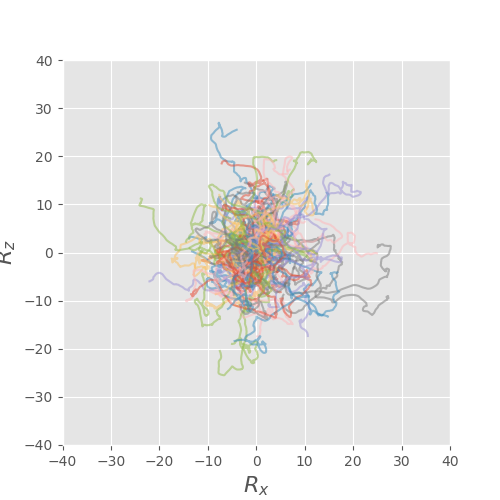

In [51]:
box=80. # set draw area as box^2
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r"$R_x$", fontsize=16) # set x-label
ax.set_ylabel(r"$R_z$", fontsize=16) # set y-label
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-rang
for p in range(nump):
    ax.plot(Rs[:, p, 0], Rs[:, p, 2], alpha = 0.5) # plot trajectories in 2D
plt.show()

Plot in 3D:

<IPython.core.display.Javascript object>


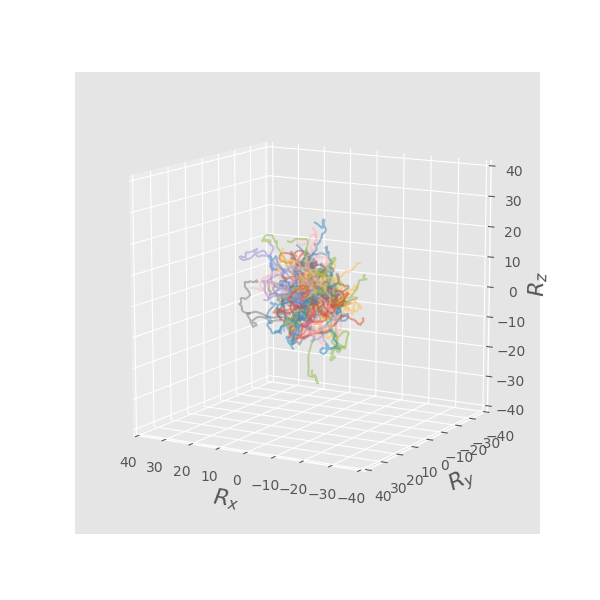

In [52]:
box=80. # set draw area as box^2
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes
ax.set_xlabel(r"$R_x$", fontsize=16)
ax.set_ylabel(r"$R_y$", fontsize=16)
ax.set_zlabel(r"$R_z$", fontsize=16) 
ax.set_xlim(-box/2,box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.view_init(elev=12,azim=120) # set view point
for p in range(nump):
    ax.plot(Rs[:, p, 0], Rs[:, p, 1],Rs[:, p , 2], alpha = 0.5) # plot trajectories in 2D
plt.show()

We observe that the particles are normaly, symmetrically distributed around origin. The distribution has time dependend variance and increasing the number of steps of the simulaiton will lead to higher smear of the final particle positions

## Code (animations):
Import libraries:

In [1]:
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
import matplotlib.animation as animation # import animation modules from matplotlib
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from mpl_toolkits.mplot3d
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib nbagg
plt.rcParams['animation.ffmpeg_path'] = "C:\\Users\\marti\\Miniconda2\\envs\\py36\\Library\\bin\\ffmpeg.exe"
mywriter = animation.FFMpegWriter(fps=30)

Define `initialization` function that sets up the artists.

In [3]:
def init():
    global R,V,W,Rs,Vs,Ws,time
    R[:,:] = 0.0 # initialize all the variables to zero
    V[:,:] = 0.0
    W[:,:] = 0.0
    Rs[:,:,:] = 0.0
    Vs[:,:,:] = 0.0
    Ws[:,:,:] = 0.0
    time[:] = 0.0
    title.set_text(r'') # initialize title
    line.set_data([],[]) # initialize line to show particle trajecotry
    line.set_3d_properties([]) # extend to 3d
    particles.set_data([], []) # initialize current posiiton for all particles
    particles.set_data([], []) # extend to 3d
    return particles, title, line # return objects to be rendered

Define `animate` function that renders the artists.

In [7]:
def animate(i):
    global R, V, W, Rs, Vs, Ws, time
    time[i] = i*dt
    W = std*np.random.randn(nump,dim) # generate zero mean normal displacement with prescribed variance
    
    # Euler scheme for velocity and position time evolution
    #V = V*(1-zeta/m*dt) + W/m
    #R = R + V*dt
    
    # Runge-Kutta Second order scheme:
    V1 = V*(1-zeta/m*0.5*dt)
    V = V-V1*zeta/m*dt + W/m + F_drift/m
    R = R + V1*dt
    
    Rs[i,:,:] = R
    Vs[i,:,:] = V
    Ws[i,:,:] = W
    title.set_text(r"t = "+str(time[i]))
    line.set_data(Rs[:i+1,n,0], Rs[:i+1,n,1]) # trace particle up to current time
    line.set_3d_properties(Rs[:i+1,n,2]) # and extend to 3d
    particles.set_data(R[:,0], R[:,1]) # render particles
    particles.set_3d_properties(R[:,2]) # and extend to 3d
    return particles, title, line # return objects to render

Define parameters and variables:

In [10]:
dim = 3 # dimensionality of the problem
nump = 1000 # number of independent particles
nums = 256 # number of simulation steps
dt = 0.05 # time increment
F_drift = np.asarray([1e-2, 0, 0]) # Optional constant drift term
zeta = 1.0
m = 1.0
kBT = 1.0 # set constants to 1.0
std = np.sqrt(2*kBT*zeta*dt) # ~ mmagnitude of random force fluctuation
np.random.seed(0)
R = np.zeros([nump, dim]) # current position
V = np.zeros([nump, dim]) # current velocity
W = np.zeros([nump, dim]) # ~ current ranmdom force
Rs = np.zeros([nums, nump, dim]) # all positions
Vs = np.zeros([nums, nump, dim]) # all velocities
Ws = np.zeros([nums, nump, dim]) # all random forces
time = np.zeros([nums]) # all times

Perform the simulation and render:

<IPython.core.display.Javascript object>


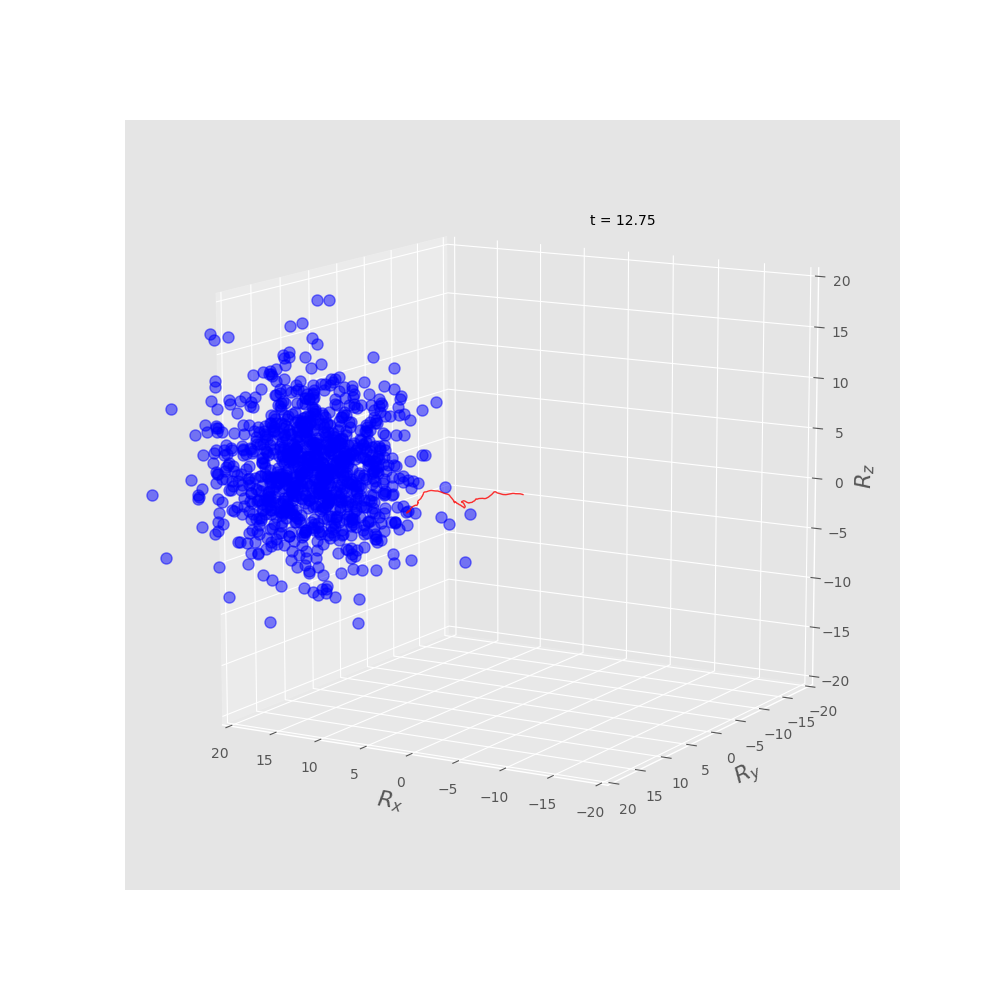

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = "3d")
box = 40
ax.set_xlabel(r"$R_x$", fontsize=16)
ax.set_ylabel(r"$R_y$", fontsize=16)
ax.set_zlabel(r"$R_z$", fontsize=16) 
ax.set_xlim(-box/2,box/2)
ax.set_ylim(-box/2,box/2)
ax.set_zlim(-box/2,box/2)
ax.view_init(elev=12,azim=120) # set view point

particles, = ax.plot([],[],[], "bo", ms = 8, alpha = 0.5) # set-up particles
# set-up title, posiiton relative to the axes bounding box
title = ax.text(-180.0, 0., 250.0, r'', transform=ax.transAxes, va='center')
line, = ax.plot([],[],[], 'r', lw = 1, alpha = 0.8) # set-up line for tracing single particle
n = 0 # pick particle to track
anim=animation.FuncAnimation(fig,animate,init_func=init,
     frames=nums,interval=5,blit=False,repeat=False) # draw animation
#anim.save('movie.mp4', writer = mywriter, dpi = 400)

It is remarkable how simple is it to prepare an animation with matplotlib.
Some ideas for further work:
* Do both RK2ndOrder and Euler and compare positions in time and at the end of simluation for all particles.
* Use some asymmetric process